In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PART 1: The Labeled Faces in the Wild Dataset

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load the Labeled Faces in the Wild (LFW) people dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X.shape

(1288, 1850)

There are 1288 images, and each image has 1850 features. This is because each image is 50x37 pixels, and each feature simply represents one pixel's intensity.

(-0.5, 36.5, 49.5, -0.5)

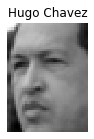

In [4]:
plt.figure(figsize=(2,2))
some_face = X[0]
some_face_image = some_face.reshape(50,37)
plt.imshow(some_face_image,cmap='gray')
plt.title(target_names[y[0]])
plt.axis('off')

The labels are:

    0: Ariel Sharon    
    1: Colin Powell       
    2: Donald Rumsfeld      
    3: George W Bush       
    4: Gerhard Schroeder      
    5: Hugo Chavez      
    6: Tony Blair  

The following figure shows a few more images from the lfw dataset

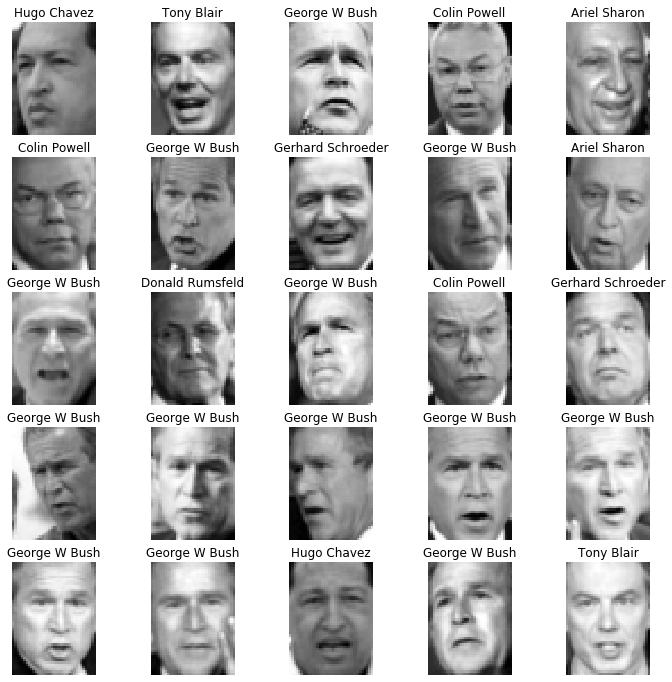

In [5]:
plt.figure(figsize=(12,12))
for i in range(25):
    face = X[i]
    face_image = face.reshape(50,37)
    plt.subplot(5,5,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.title(target_names[y[i]])
    plt.axis('off')

## Assignments

1. Split the dataset into training, validation and test sets
2. Pick your favourite multiclass classifier (softmax, knn-classifier, svd-classifier, etc)
3. Use the training set to train the classifier
4. Use the validation set to tune-in the parameters of the classifier
5. Test your classifier on the test set

In [6]:
'Split Dataset'
X_train,y_train = X[:600],y[:600] #used for training the model
X_val,y_val = X[600:1200],y[600:1200] #used for choosing k
X_test,y_test = X[1200:],y[1200:] #used for testing the accuracy of the model

y

array([5, 6, 3, ..., 5, 3, 5])

In [7]:
'split X_train'
X_list = [] #[X0,X1,...,X6]
for i in range(7):
    X_list.append(X_train[y_train==i])

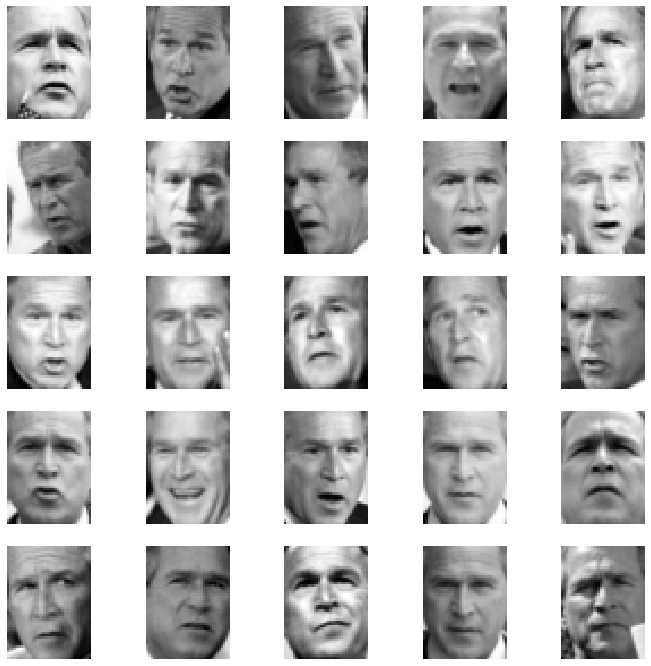

In [8]:
'Test if the split worked according to the labels above'
plt.figure(figsize=(12,12))
X0 = X_list[3]
for i in range(25):
    plt.subplot(5,5,i+1)
    image = X0[i].reshape(50,37)
    plt.imshow(image,cmap='gray')
    plt.axis('off')

In [9]:
'Computing SVD of each'
V_list = []
for i in range(7):
    _,_,V = np.linalg.svd(X_list[i])
    V_list.append(V)

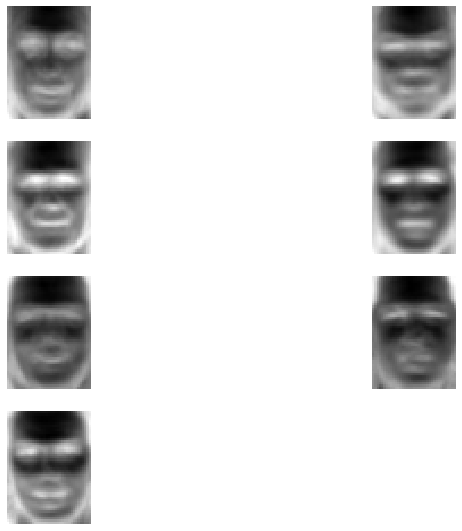

In [10]:
'first row of V'
plt.figure(figsize=(12,12))
for i in range(7):
    image = V_list[i][0].reshape(50,37)
    plt.subplot(5,2,i+1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')

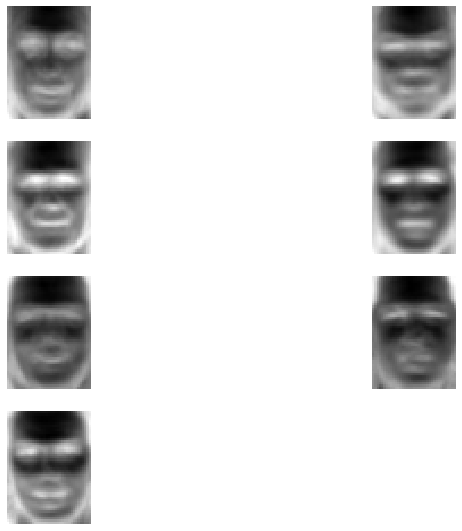

In [11]:
'Second row of V'
plt.figure(figsize=(12,12))
for i in range(7):
    image = V_list[i][0].reshape(50,37)
    plt.subplot(5,2,i+1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')

In [12]:
Vk_list = []
k = 4
for i in range(7):
    Vk_list.append(V_list[i][:k])

In [13]:
'Classift an unknown face'
unknown_face = X_train[123][None,:]

distances = np.zeros(7)
for i in range(7):
    orth = unknown_face - unknown_face@Vk_list[i].T@Vk_list[i]
    distances[i] = np.linalg.norm(orth)

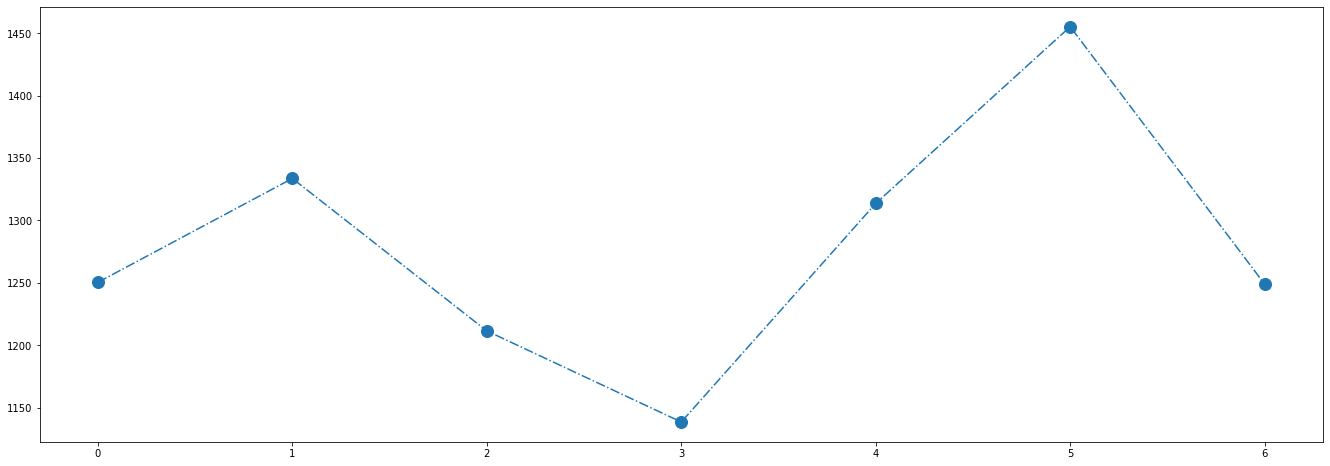

In [14]:
plt.figure(figsize=(23,8))
plt.plot(range(7),distances,'o-.',markersize = 12)

In [15]:
np.argmin(distances)

3

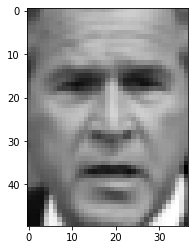

In [16]:
unknown_image = unknown_face.reshape(50,37)
plt.imshow(unknown_image,cmap='gray')

In [17]:
'Classify the validation set using different k values'
pct_incorrect = np.zeros((40,1))
k_list = [k+1 for k in range(40)]

for k in k_list: #k = 1,2,3,...,40
    print(k)
    
    'first k rows of V matrices'
    Vk_list = []
    for i in range(7):
        Vk_list.append(V_list[i][:k])
        
    y_val_predicted = [] #initialize y_val_predicted
    'classify validation faces'
    for j in range(len(y_val)):
        unknown_face = X_val[j,:]
        distances = np.zeros(7)
        'compute distances'
        for i in range(7):
            orth = unknown_face - unknown_face@Vk_list[i].T@Vk_list[i]
            distances[i] = np.linalg.norm(orth)
        y_val_predicted.append(np.argmin(distances))
        
    'percentage of incorrect classifications'
    num_incorrect = sum(y_val != y_val_predicted)
    pct_incorrect[k-1] = 100*num_incorrect/len(y_val)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


Text(0.5, 1.0, 'percentage of incorrect classifications')

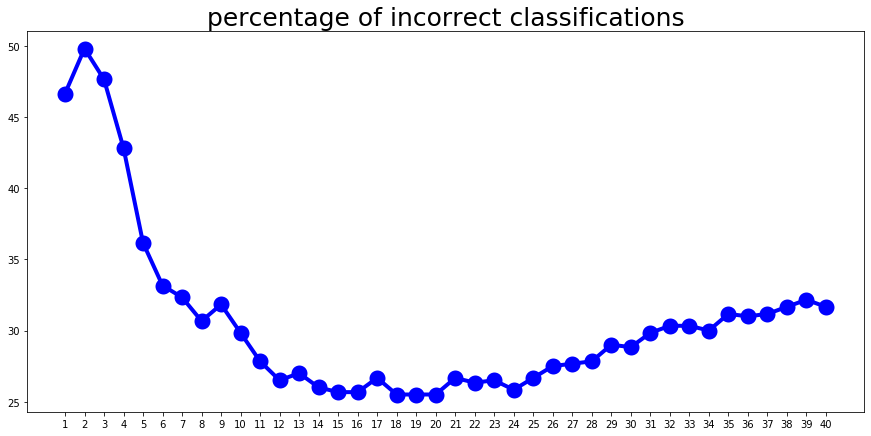

In [18]:
plt.figure(figsize=(15,7))
plt.plot(k_list,pct_incorrect,'bo-',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('percentage of incorrect classifications',fontsize=25)

In [19]:
'smallest error k value'
k_wanted = k_list[np.argmin(pct_incorrect)]
k_wanted

18

In [20]:
'Testing The Model'
k = k_wanted
'first k rows of the V matrices'
Vk_list = []
for i in range(7):
    Vk_list.append(V_list[i][:k])
    
y_test_predicted = [] #initialize y_val_predicted
'classify validation digits'
for j in range(len(y_test)):
    unknown_face = X_test[j,:]
    distances = np.zeros(7)
    'compute distances'
    for i in range(7):
        orth = unknown_face - unknown_face@Vk_list[i].T@Vk_list[i]
        distances[i] = np.linalg.norm(orth)            
    y_test_predicted.append(np.argmin(distances))
y_test_predicted = np.array(y_test_predicted)

In [21]:
'confusion matrix'
C = np.random.randn(7,7)
for i in range(7):
    for j in range(7):
        C[i,j] = sum(y_test_predicted[y_test==i]==j)
C

array([[ 4.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 14.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  4.,  4.,  0.,  0.,  0.],
       [ 1.,  1.,  0., 31.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  3.,  2.,  0.,  2.],
       [ 0.,  0.,  0.,  4.,  0.,  4.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  4.]])

In [22]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_predicted)
100*num_correct/len(y_test)

71.5909090909091

# Part 2: The Titanic Dataset

The goal is to train a logistic regression model that predicts which passengers survived the Titanic shipwreck.

In [23]:
import pandas as pd

In [24]:
'load the Titanic dataset'
url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/train_titanic.csv'
data_train = pd.read_csv(url,index_col=0)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived - 0 = No; 1 = Yes

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

-----------------------------------------------------------------------------------

Before training the model, let's do some feature engineering

The features **ticket** and **cabin** have many missing values. We will drop them from the dataframe.

In [25]:
data_train = data_train.drop(['Ticket','Cabin'], axis=1) 
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Convert ‘Sex’ feature into numeric.

In [26]:
genders = {"male": 0, "female": 1}
data_train['Sex'] = data_train['Sex'].map(genders)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


Convert ‘Embarked’ feature into numeric

In [27]:
ports = {"S": 0, "C": 1, "Q": 2}
data_train['Embarked'] = data_train['Embarked'].map(ports)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0


Combine the SibSp and Parch features

In [28]:
data_train['relatives'] = data_train['SibSp'] + data_train['Parch']
data_train.loc[data_train['relatives'] > 0, 'not_alone'] = 0
data_train.loc[data_train['relatives'] == 0, 'not_alone'] = 1
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,1,0.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,1,0.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,0,1.0


Add the Fare per Person feature

In [29]:
data_train['Fare Per Person'] = data_train['Fare']/(data_train['relatives']+1)
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Fare Per Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,1,0.0,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,1,0.0,35.64165
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,0,1.0,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,1,0.0,26.55000
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,0,1.0,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0.0,0,1.0,13.00000
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0.0,0,1.0,30.00000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,23.4500,0.0,3,0.0,5.86250


## Assignments

1. Use the dataframe data_train to train a logistic regression model that predicts which passengers survived the Titanic.
2. Load the data_test dataframe

In [30]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','relatives','not_alone','Fare Per Person']

X_train = data_train[features].to_numpy()
X_train[np.isnan(X_train)]= 1
X_train.shape

(891, 10)

In [31]:
s = 1
m,n = X_train.shape
n_iterations = 40000
y_train = data_train['Survived'].to_numpy().reshape((m,1))

means = X_train.mean()
stds = X_train.std()

X_train_scaled = (X_train - means)/stds

'sigmoid function'
def sigmoid(t):
    return 1/(1+np.exp(-t))

'cost function'
def cost(y,X,theta):
    m = len(y)
    return -1/m*(y.T@np.log(sigmoid(X@theta))+(1-y).T@np.log(1-sigmoid(X@theta)))

'Logistic regression with Gradient Descent'
def log_regression_GD(X,y,s,n_iterations):
    m,n = X.shape
    theta = np.random.randn(n,1)
    E = np.zeros((n_iterations,1))
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(sigmoid(X@theta)-y) # compute gradient
        theta = theta - s*gradient # Gradient Descent Step
        E[i] = cost(y,X,theta) # compute the cost function
    return E,theta

E, theta = log_regression_GD(X_train_scaled,y_train,s,n_iterations)

Text(0, 0.5, 'Cost')

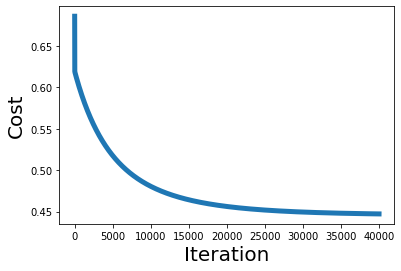

In [32]:
plt.plot(E,linewidth=5)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Cost',fontsize=20)

In [33]:
y_predicted = sigmoid(X_train_scaled@theta)

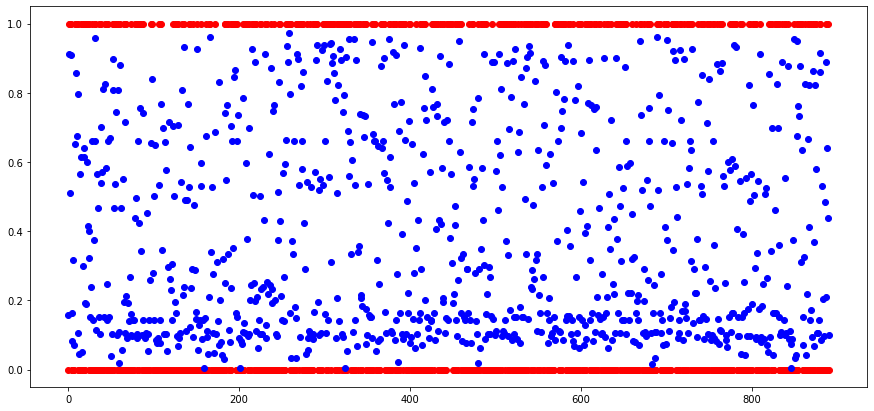

In [34]:
'compare y and y_predicted'
plt.figure(figsize=(15,7))
plt.plot(y_train,'ro')
plt.plot(y_predicted,'bo')

In [35]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/test_titanic.csv'
data_test = pd.read_csv(url,index_col=0)

genders = {"male": 0, "female": 1}
data_test['Sex'] = data_test['Sex'].map(genders)

ports = {"S": 0, "C": 1, "Q": 2}
data_test['Embarked'] = data_test['Embarked'].map(ports)

data_test['relatives'] = data_test['SibSp'] + data_test['Parch']
data_test.loc[data_test['relatives'] > 0, 'not_alone'] = 0
data_test.loc[data_test['relatives'] == 0, 'not_alone'] = 1

data_test['Fare Per Person'] = data_test['Fare']/(data_test['relatives']+1)


data_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Fare Per Person
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0,1.0,7.829200
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1,0.0,3.500000
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0,1.0,9.687500
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,1.0,8.662500
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2,0.0,4.095833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0,0,1.0,8.050000
1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,0,1.0,108.900000
1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1.0,7.250000


3. Use your logistic regression model to predict whether the other 418 passengers on board (found in data_test) survived.

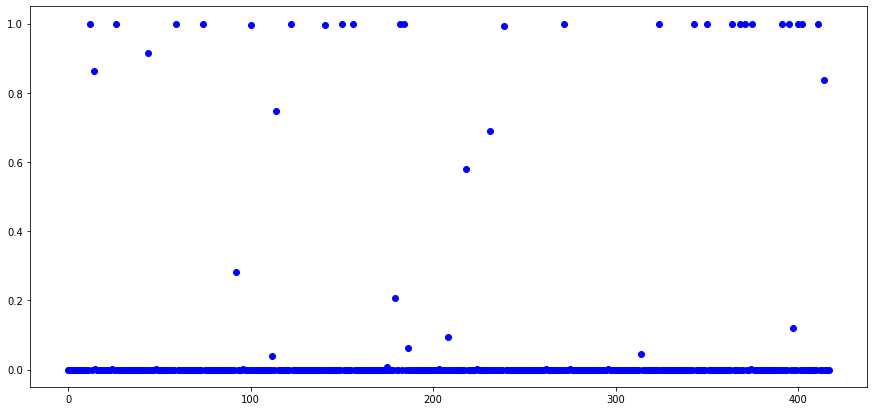

In [36]:
X_test = data_test[features].to_numpy()

y_predicted = sigmoid(X_test@theta);

y_predicted[np.isnan(y_predicted)]=0

'compare y and y_predicted'
plt.figure(figsize=(15,7))
plt.plot(y_predicted,'bo')


[31.] predicted survivors.
[387.] predicted deaths.


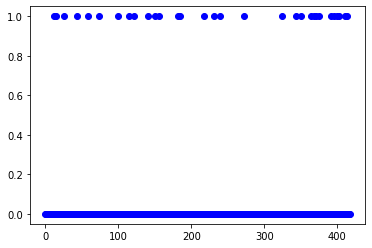

In [37]:
'predictor function'
def predictor(y,p):
    n = len(y)
    yy = np.zeros((n,1))
    yy[y>=p]=1
    return yy
yy = predictor(y_predicted,0.5)
plt.plot(yy,'bo')
print(str(sum(yy)) + ' predicted survivors.')
print(str(len(yy) - sum(yy)) + ' predicted deaths.')


# Part 3: A Face Detector

We are going to build a simple facial detection algorithm

In [38]:
from skimage import data, color, feature
import skimage.data

Instead of using pixel intensities as features (as you did in Part 1), we'll use the HOG (Histrogram of Oriented Gradients) features.
HOG features focus on the structure or the shape of an object, and they are widely used in computer vision tasks for object detection.

Wikipedia has a reasonably good entry on HOG: https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients

Text(0.5, 1.0, 'visualization of HOG features')

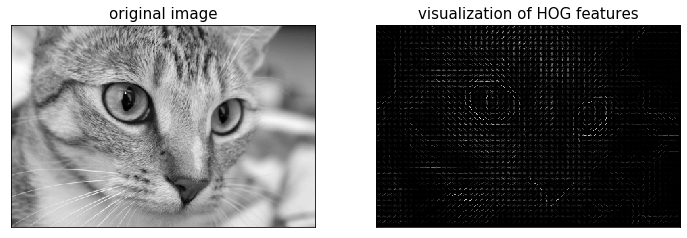

In [39]:
'visualization of HOG features'

image = color.rgb2gray(data.chelsea()) #load an image
hog_vec, hog_vis = feature.hog(image,visualize=True) #extract HOG features

'plot image and hog features'
fig, ax = plt.subplots(1,2, figsize = (12,6),
                       subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('original image',fontsize=15)

ax[1].imshow(hog_vis,cmap = 'gray')
ax[1].set_title('visualization of HOG features',fontsize=15)

To build our face detector, we need

1. A set of face images

2. A set of nonface images

3. To extract the HOG features from all the images

**Step 1:** Obtain a set of image thumbnails of faces to constitute positive training samples

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people() #load the labeled faces in the wild dataset
positive_patches = faces.images

positive_patches.shape

(13233, 62, 47)

This gives us a sample of 8211 face images 

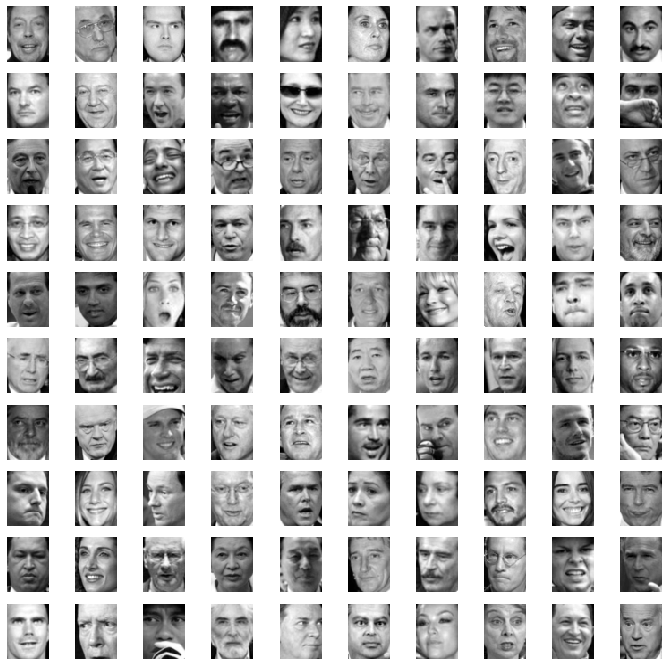

In [41]:
'show the first 100 faces'
plt.figure(figsize=(12,12))
for i in range(100):
    face_image = positive_patches[i]
    plt.subplot(10,10,i+1)
    plt.imshow(face_image,cmap = 'gray')
    plt.axis('off')

**Step 2:** Obtain a set of negative training samples

In [42]:
from skimage import data, transform

In [43]:
imgs_to_use = ['camera','text','coins','moon','page','clock','immunohistochemistry','chelsea','coffee','hubble_deep_field']
images = [color.rgb2gray(getattr(data,name)()) for name in imgs_to_use]
len(images)

10

We'll extract 62x47 thumbnails from these 10 images

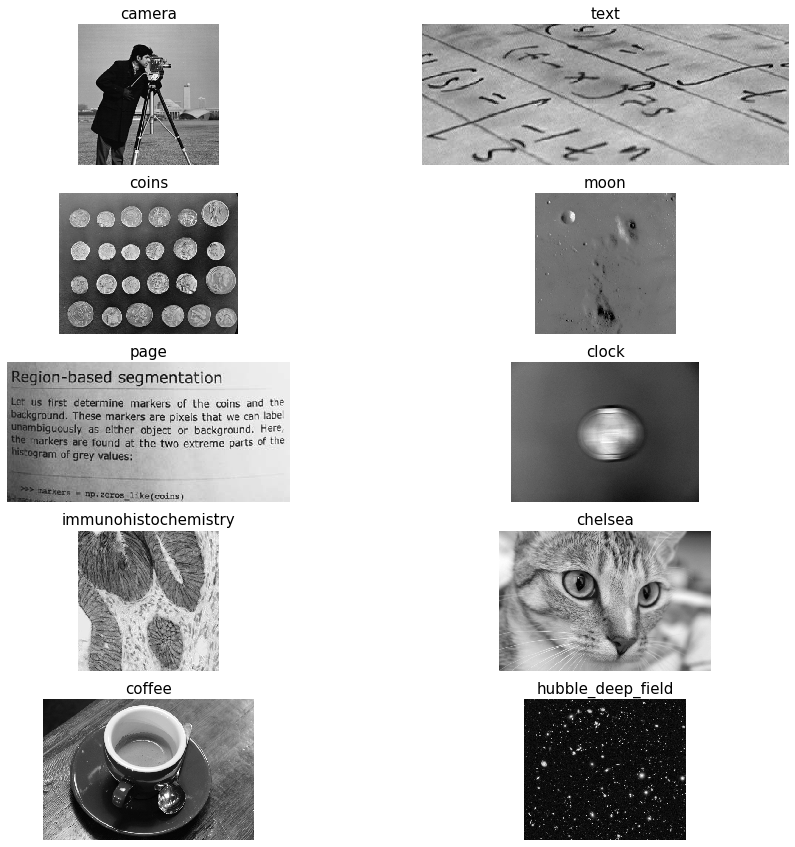

In [44]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(imgs_to_use[i],fontsize=15)
    plt.axis('off')

In [45]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img,N,scale=1.0,patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale*np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N,random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale !=1:
        patches = np.array([transform.resize(patch,patch_size) for patch in patches])
    return patches

In [46]:
negative_patches = np.vstack([extract_patches(im,500,scale) for im in images for scale in [1.0, 2.0]])

In [47]:
negative_patches.shape

(10000, 62, 47)

This gives us a sample of 10000 nonface images

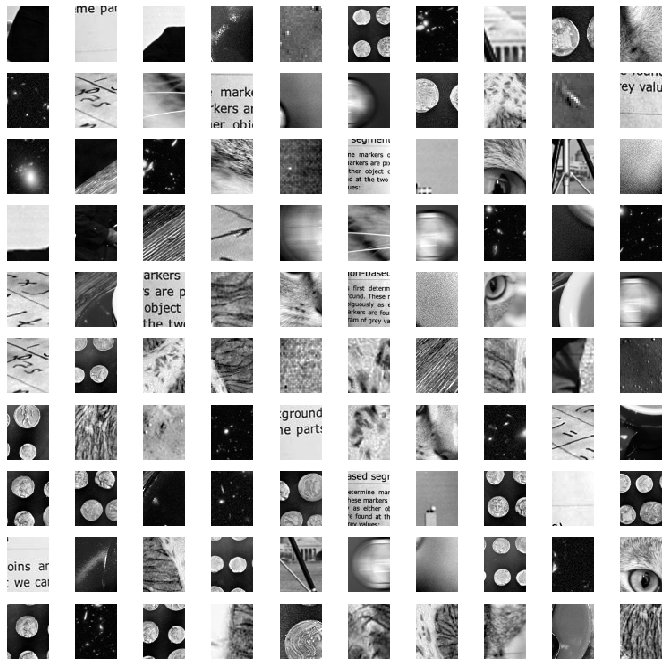

In [48]:
'show 100 (randomly chosen) nonface images'
plt.figure(figsize=(12,12))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(negative_patches[np.random.randint(10000)],cmap='gray')
    plt.axis('off')

**Step 3:** Combine sets and extract HOG features

In [49]:
hog_positive_patches = np.array([feature.hog(img) for img in positive_patches])
hog_negative_patches = np.array([feature.hog(img) for img in negative_patches])

'feature matrix'
X = np.r_[hog_positive_patches, hog_negative_patches]

'label vector'
y = np.zeros(X.shape[0]) # 1 = face; 0 = nonface
y[:positive_patches.shape[0]]=1
y = y[:,None]


## Assignments

1. Using X and y, train a logistic regression model

2. Using the logistic regression model, write a function that classifies an image as a face or as a nonface

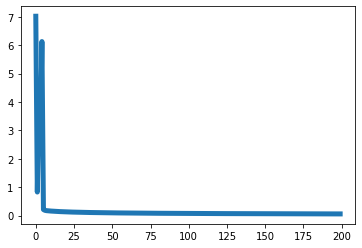

In [50]:
'Train a logistic regression model'
X_train = X
y = y
s = 5.875
n_iterations = 200

E,theta = log_regression_GD(X_train,y,s,n_iterations)

plt.plot(E,linewidth = 5)

In [51]:
def face_classifier(X,theta):
    'your code here'
    y_predicted = sigmoid(X@theta)
    yy = predictor(y_predicted,.5)
    return yy

**Find faces in a new image:** Now that we have a logistic regression model in place, let's grab a new image and see how the model does. 

(-0.5, 431.5, 575.5, -0.5)

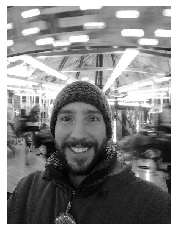

In [52]:
import matplotlib.image as mpimg 
from skimage import io

url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/yourfavouriteprofessor.jpg'
new_image = io.imread(url)

new_image = color.rgb2gray(new_image) #transform image into gray scale
plt.imshow(new_image,cmap='gray')
plt.axis('off')

(-0.5, 131.5, 176.5, -0.5)

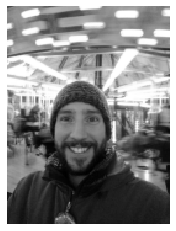

In [53]:
'scale new_image so that the face has size 62x47'
s = 3.25
new_image = skimage.transform.resize(new_image, (new_image.shape[0]//s, new_image.shape[1]//s))
plt.imshow(new_image,cmap='gray')
plt.axis('off')

We will pass a sliding window across the image, using the classifier function to evaluate whether that window contains a face or not.

In [54]:
def sliding_window(img,patch_size=positive_patches[0].shape,
                  istep=2,jstep=2,scale=1.0):
    Ni,Nj = (int(scale*s) for s in patch_size)
    for i in range(0,img.shape[0]-Ni,istep):
        for j in range(0,img.shape[1]-Ni,jstep):
            patch = img[i:i+Ni,j:j+Nj]
            if scale !=1:
                patch - transform.resize(patch,patch_size)
            yield(i,j), patch
            
indices, patches = zip(*sliding_window(new_image)) #apply sliding_window to new_image
patches_hog = np.array([feature.hog(patch) for patch in patches]) #extract HOG features
patches_hog.shape

(2030, 1215)

Finally, we can take the HOG features patches and use the classifier function to evaluate whether each patch contains a face

In [55]:
labels = face_classifier(patches_hog,theta)
labels = labels.flatten()

In [56]:
'number of face detections'
labels.sum()

85.0

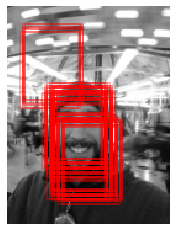

In [57]:
'draw a red rectangle where the classifier function has found a face'
fig, ax = plt.subplots()
ax.imshow(new_image,cmap='gray')
ax.axis('off')

Ni,Nj = positive_patches[0].shape
indices = np.array(indices)
for i,j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j,i), Nj,Ni,edgecolor='red',alpha=0.3,lw=2,facecolor='none'))